# Early stopping

In [1]:
from sklearn.datasets import make_moons
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

## Dataset creation

In [2]:
# Dataset generation
X, y = make_moons(n_samples=100, noise=0.3, random_state=0)

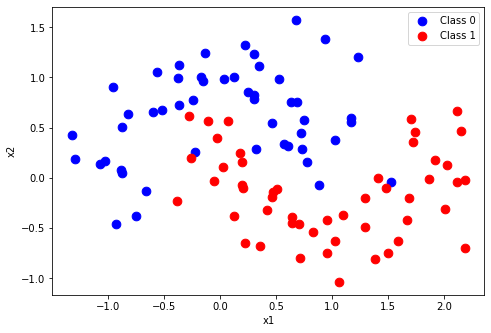

In [3]:
x1 = X[:,0]
x2 = X[:,1]

zero_class = (y ==0)
one_class =  (y==1)

fig_admission = plt.figure()
ax_admission = fig_admission.add_axes([0,0,1,1])
ax_admission.scatter(x1[zero_class],x2[zero_class], c='b', s=75, label='Class 0')
ax_admission.scatter(x1[one_class], x2[one_class], c='r',s=75, label='Class 1')
ax_admission.set_xlabel('x1')
ax_admission.set_ylabel('x2')
ax_admission.legend(loc=1,numpoints=1)

In [4]:
# Training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =0)

## Neural network training and testing

In [5]:
# Neural network

model = Sequential()
model.add(Dense(200, input_dim=2, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# Training
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1)

Epoch 1/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.6749 - accuracy: 0.7143 - val_loss: 0.6331 - val_accuracy: 0.8333
Epoch 2/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.6023 - accuracy: 0.7857 - val_loss: 0.5712 - val_accuracy: 0.8000
Epoch 3/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.5327 - accuracy: 0.8000 - val_loss: 0.5086 - val_accuracy: 0.8000
Epoch 4/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.4714 - accuracy: 0.8143 - val_loss: 0.4471 - val_accuracy: 0.8667
Epoch 5/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.4102 - accuracy: 0.8286 - val_loss: 0.3962 - val_accuracy: 0.8667
Epoch 6/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.3633 - accuracy: 0.8429 - val_loss: 0.3554 - val_accuracy: 0.8667
Epoch 7/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.3369 - accuracy: 0.8429 - val_loss: 0.3292 - val_accuracy: 0.8667
Epoch 8/1000
3/3 [=

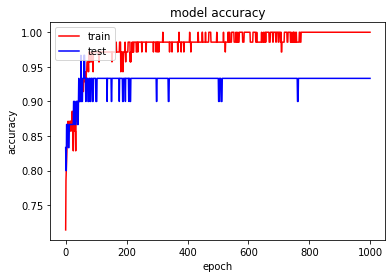

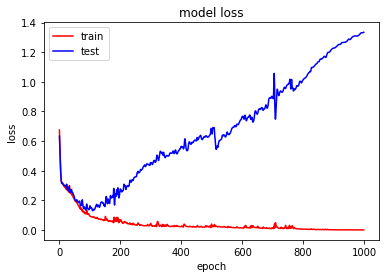

In [7]:
# Plot history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Early stopping

In [8]:
# Early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# Neural network with early stopping

model = Sequential()
model.add(Dense(200, input_dim=2, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000,verbose=1,callbacks=[es])

Epoch 1/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6797 - accuracy: 0.6429 - val_loss: 0.6166 - val_accuracy: 0.8667
Epoch 2/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.5952 - accuracy: 0.8286 - val_loss: 0.5562 - val_accuracy: 0.8333
Epoch 3/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.5250 - accuracy: 0.8143 - val_loss: 0.4925 - val_accuracy: 0.8667
Epoch 4/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.4626 - accuracy: 0.8286 - val_loss: 0.4332 - val_accuracy: 0.8667
Epoch 5/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.4062 - accuracy: 0.8429 - val_loss: 0.3847 - val_accuracy: 0.8667
Epoch 6/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.3789 - accuracy: 0.8429 - val_loss: 0.3549 - val_accuracy: 0.8667
Epoch 7/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.3583 - accuracy: 0.8429 - val_loss: 0.3366 - val_accuracy: 0.8667
Epoch 8/1000
3/3 [=

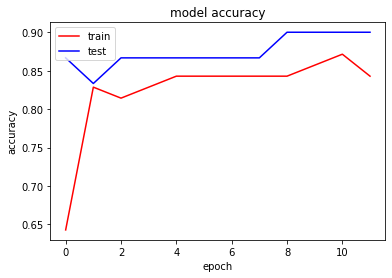

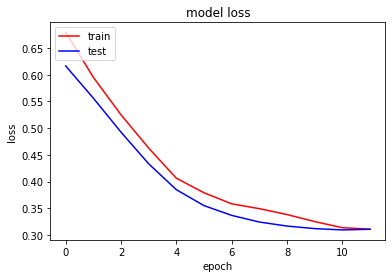

In [9]:
# Plot history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Early stopping with patience

In [10]:
# Early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 20)

# Neural netwok with early stopping

model = Sequential()
model.add(Dense(200, input_dim=2, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000,verbose=1,callbacks=[es])

Epoch 1/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6754 - accuracy: 0.6000 - val_loss: 0.6255 - val_accuracy: 0.8000
Epoch 2/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.5890 - accuracy: 0.8000 - val_loss: 0.5615 - val_accuracy: 0.8333
Epoch 3/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.5200 - accuracy: 0.8143 - val_loss: 0.4968 - val_accuracy: 0.8667
Epoch 4/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.4564 - accuracy: 0.8429 - val_loss: 0.4353 - val_accuracy: 0.8667
Epoch 5/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.3995 - accuracy: 0.8286 - val_loss: 0.3862 - val_accuracy: 0.8667
Epoch 6/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.3581 - accuracy: 0.8429 - val_loss: 0.3485 - val_accuracy: 0.8667
Epoch 7/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.3360 - accuracy: 0.8429 - val_loss: 0.3261 - val_accuracy: 0.8667
Epoch 8/1000
3/3 [=

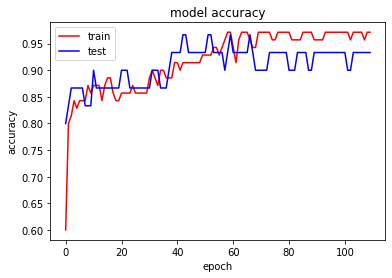

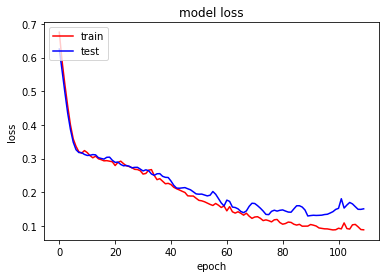

In [11]:
# Plot history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Early stopping with patience and Modelcheckpoint saving

In [12]:
# Model checkpoint

#mc = ModelCheckpoint(best_model.accuracyitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

checkpoint_filepath = './bestmodel'



mc = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath,save_weights_only=True, monitor='val_accuracy',mode='max',save_best_only=True)

# Early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 20)

# Neural network with early stopping

model = Sequential()
model.add(Dense(200, input_dim=2, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

story = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200,verbose=1,callbacks=[es,mc])

Epoch 1/200
3/3 [==============================] - 0s 24ms/step - loss: 0.6743 - accuracy: 0.6143 - val_loss: 0.6238 - val_accuracy: 0.8000
Epoch 2/200
3/3 [==============================] - 0s 7ms/step - loss: 0.5825 - accuracy: 0.7857 - val_loss: 0.5594 - val_accuracy: 0.8000
Epoch 3/200
3/3 [==============================] - 0s 6ms/step - loss: 0.5133 - accuracy: 0.8000 - val_loss: 0.4928 - val_accuracy: 0.8000
Epoch 4/200
3/3 [==============================] - 0s 9ms/step - loss: 0.4495 - accuracy: 0.8143 - val_loss: 0.4267 - val_accuracy: 0.8667
Epoch 5/200
3/3 [==============================] - 0s 5ms/step - loss: 0.3932 - accuracy: 0.8143 - val_loss: 0.3738 - val_accuracy: 0.8667
Epoch 6/200
3/3 [==============================] - 0s 6ms/step - loss: 0.3529 - accuracy: 0.8429 - val_loss: 0.3456 - val_accuracy: 0.8667
Epoch 7/200
3/3 [==============================] - 0s 6ms/step - loss: 0.3329 - accuracy: 0.8571 - val_loss: 0.3408 - val_accuracy: 0.8333
Epoch 8/200
3/3 [=========

In [13]:
# Loading the the best performing model
model.load_weights(checkpoint_filepath)

# Testing the best performing model
y_pred = model.predict_classes(X_test)
print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100) 




Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[15  1]
 [ 0 14]]
96.66666666666667
